## Comcast Telecom Consumer Complaints .
Project 3 

__DESCRIPTION__

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

__Data Dictionary__

    Ticket #:           Ticket number assigned to each complaint
    Customer Complaint: Description of complaint
    Date:               Date of complaint
    Time:               Time of complaint
    Received Via:       Mode of communication of the complaint
    City:               Customer city
    State:              Customer state
    Zipcode:            Customer zip
    Status:             Status of complaint 
    Filing on behalf of someone

__Analysis Task__

To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.

- Import data into Python environment.
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
- Provide a table with the frequency of complaint types.

- Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
- Provide state wise status of complaints in a stacked bar chart. 

Use the categorized variable from Q3. Provide insights on:

- Which state has the maximum complaints
- Which state has the highest percentage of unresolved complaints
- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

The analysis results to be provided with insights wherever applicable.

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
%matplotlib inline

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from itertools import product
from sklearn.metrics import r2_score

__Import the data__

In [2]:
data = pd.read_csv('~/Python_Project2/Comcast_telecom_complaints_data.csv')
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [3]:
data.shape

(2224, 11)

In [4]:
# renaming the column
data.rename(columns = {'Ticket #' :'Ticket','Customer Complaint':'Customer_complaint'},inplace=True)

In [5]:
#find null values
data.isnull().sum()

Ticket                         0
Customer_complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

It shows no null values in data

In [6]:
#find duplicate value
data.duplicated().sum()

0

Data has no duplicates

__Provide the trend chart for the number of complaints at monthly and daily granularity levels.__

In [7]:
# convert column in datetime format and created col for date and month saperately
import datetime
data['Date_month_year'] = pd.to_datetime(data['Date_month_year'])
data['Month'] = data['Date_month_year'].dt.month
data['created_date'] = data['Date_month_year'].apply(lambda x : x.day)
data.head()

,Ticket,Customer_complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,created_date
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,22
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,4
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,18
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,5
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,26


Text(0.9, 0.95, 'Max complaint in Jun')

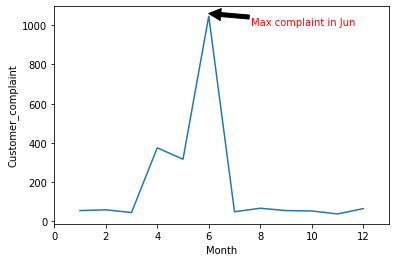

In [8]:
# The trend chart for the number of complaints at monthly basis
grpbyMonth = data.groupby('Month').count().reset_index()
lp = sns.lineplot(x='Month',y='Customer_complaint',data=grpbyMonth)
ax = lp.axes
ax.set_xlim(0, 13);
ax.annotate('Max complaint in Jun', color='red',xy=(6, 1060),xycoords='data',
           xytext=(0.9, 0.95),textcoords='axes fraction',
           arrowprops=dict(facecolor='black',shrink=1),
           horizontalalignment='right',verticalalignment='top')

(0.0, 32.0)

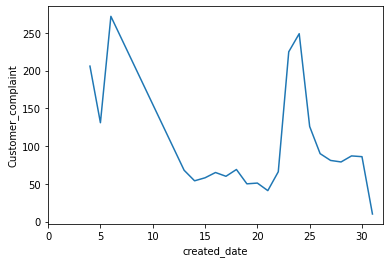

In [9]:
# The trend chart for the number of complaints on daily granularity levels
grpby = data.groupby('created_date').count().reset_index()
lp = sns.lineplot(x='created_date',y='Customer_complaint',data=grpby)
ax= lp.axes
ax.set_xlim(0,32)

__Provide a table with the frequency of complaint types.__

In [11]:
data['Customer_complaint'] = data['Customer_complaint'].str.title()
complaint_frq = data['Customer_complaint'].value_counts()
complaint_frq.head(10)

Comcast                     102
Comcast Data Cap             30
Comcast Internet             29
Comcast Data Caps            21
Comcast Billing              18
Comcast Service              15
Internet Speed               15
Data Caps                    13
Unfair Billing Practices     13
Data Cap                     12
Name: Customer_complaint, dtype: int64

__Which complaint types are maximum i.e., around internet, network issues, or across any other domains.__

In [12]:
from wordcloud import WordCloud, STOPWORDS

In [13]:
common_complaints = data['Customer_complaint'].dropna().tolist()
common_complaints = ''.join(common_complaints).lower()

list_stops = ('Comcast','Now','Company','Day','Someone','Thing','Also',
              'Got','Way','Call','Called','One','Said','Tell')
for word in list_stops:
    STOPWORDS.add(word)

In [14]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                       background_color='white',
                       width=1200,
                       height=1000).generate(common_complaints)

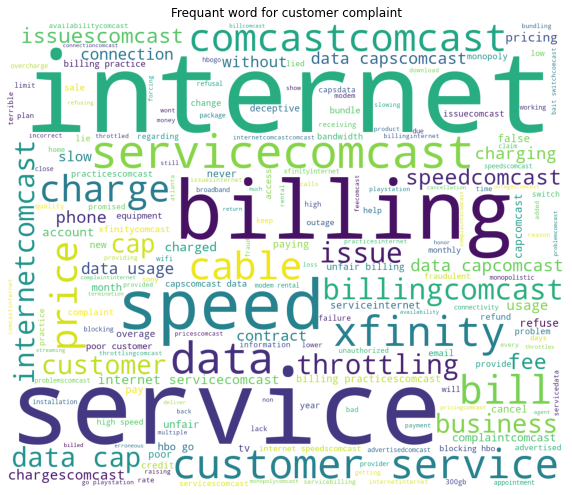

In [15]:
plt.figure(figsize=(10,12))
plt.imshow(wordcloud)
plt.title('Frequant word for customer complaint')
plt.axis('off')
plt.show();

Internet related complaints are maximum.

#### __Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.__

In [16]:
data['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [17]:
data['Status1'] = data['Status'].replace({'Solved':'Closed','Pending':'Open'})
data.head()

,Ticket,Customer_complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,created_date,Status1
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,22,Closed
1,223441,Payment Disappear - Service Got Disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,4,Closed
2,242732,Speed And Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,18,Closed
3,277946,Comcast Imposed A New Usage Cap Of 300Gb That ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,5,Open
4,307175,Comcast Not Working And No Service To Boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,26,Closed


__Provide state wise status of complaints in a stacked bar chart.__

In [18]:
grpbyStatewiseStatus = data.groupby(['State','Status1']).size().unstack()

<Figure size 432x288 with 0 Axes>

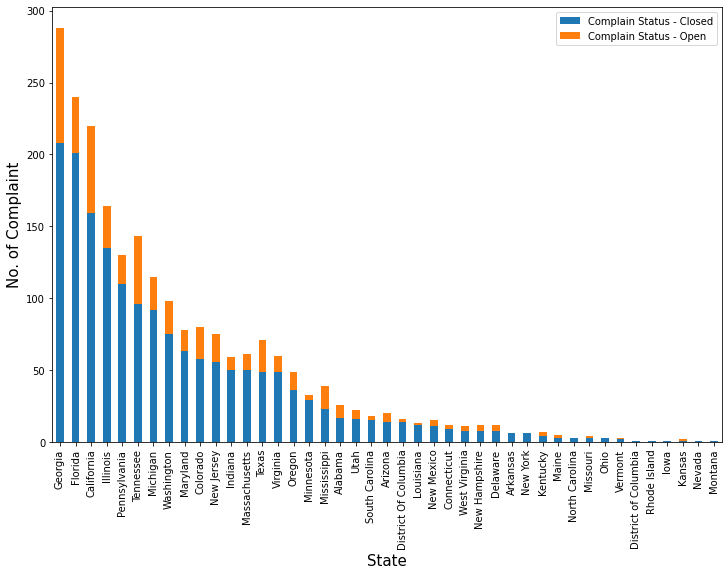

In [37]:
plt.figure()

grpbyStatewiseStatus.sort_values('Closed',
                                 axis=0,
                                 ascending=False).plot(kind='bar', 
                                                      figsize=(12, 8),
                                                      stacked=True)
plt.xlabel('State',fontsize=15)
plt.ylabel('No. of Complaint',fontsize=15)
plt.legend(['Complain Status - Closed','Complain Status - Open'])
plt.show();

### Use the categorized variable from Q3. Provide insights on:

__Which state has the maximum complaints__

In [39]:
# find quarter according to 'Date_month_year' column
data['Qtr'] = data['Date_month_year'].dt.quarter
data.head(10)

,Ticket,Customer_complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,created_date,Status1,Qtr
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,22,Closed,2
1,223441,Payment Disappear - Service Got Disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,4,Closed,3
2,242732,Speed And Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,18,Closed,2
3,277946,Comcast Imposed A New Usage Cap Of 300Gb That ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,5,Open,3
4,307175,Comcast Not Working And No Service To Boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,26,Closed,2
5,338519,Isp Charging For Arbitrary Data Limits With Ov...,06-12-15,2015-12-06,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No,12,6,Closed,4
6,361148,Throttling Service And Unreasonable Data Caps,24-06-15,2015-06-24,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No,6,24,Open,2
7,359792,Comcast Refuses To Help Troubleshoot And Corre...,23-06-15,2015-06-23,6:56:14 PM,Internet,Adrian,Michigan,49221,Solved,No,6,23,Closed,2
8,318072,Comcast Extended Outages,06-01-15,2015-01-06,11:46:30 PM,Customer Care Call,Alameda,California,94502,Closed,No,1,6,Closed,1
9,371214,Comcast Raising Prices And Not Being Available...,28-06-15,2015-06-28,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes,6,28,Open,2


In [21]:
# data for Q3
dataQ3 = data.loc[data['Qtr']==3]
dataQ3

,Ticket,Customer_complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,created_date,Status1,Qtr
1,223441,Payment Disappear - Service Got Disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,4,Closed,3
3,277946,Comcast Imposed A New Usage Cap Of 300Gb That ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,5,Open,3
20,327657,Internet Out All The Time But They Have A Mono...,06-07-15,2015-07-06,8:55:43 PM,Customer Care Call,Alexandria,Virginia,22305,Solved,No,7,6,Closed,3
21,328742,Horrible Cable Service And Customer Service,06-08-15,2015-08-06,3:18:58 PM,Internet,Alexandria,Virginia,22312,Solved,No,8,6,Closed,3
22,328165,Speed,06-08-15,2015-08-06,12:03:37 PM,Customer Care Call,Alexandria,Virginia,22304,Solved,No,8,6,Closed,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2190,222759,Monopolistic Billing Practices,04-07-15,2015-07-04,6:57:54 PM,Customer Care Call,Winnetka,Illinois,60093,Closed,No,7,4,Closed,3
2203,329247,Inconsistent And Intermittent Internet Connect...,06-08-15,2015-08-06,6:17:50 PM,Internet,Woodstock,Georgia,30188,Solved,No,8,6,Closed,3
2209,279410,False Advertising/Bait And Switch,05-07-15,2015-07-05,9:47:36 PM,Customer Care Call,Worth,Illinois,60482,Solved,No,7,5,Closed,3
2211,221763,Comcast,04-07-15,2015-07-04,1:49:52 PM,Internet,Wyoming,Michigan,49509,Closed,No,7,4,Closed,3


In [22]:
# Statewise customer complaint
Q3_grpby = dataQ3.groupby('State')[['Customer_complaint']].agg(['count'])
Q3_grpby

,Customer_complaint
,count
State,
Alabama,2
California,16
Colorado,7
Connecticut,2
Florida,30
Georgia,21
Illinois,20
Indiana,4


In [23]:
# State which has max complaint
Q3_grpby.idxmax().max()

'Florida'

__Which state has the highest percentage of unresolved complaints__

In [24]:
unresolvedComplaintData = dataQ3.loc[data.Status1 == "Open"]
unresolvedComplaintData

,Ticket,Customer_complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,created_date,Status1,Qtr
3,277946,Comcast Imposed A New Usage Cap Of 300Gb That ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,5,Open,3
82,278509,Data Caps,05-07-15,2015-07-05,2:55:45 PM,Internet,Atlanta,Georgia,30363,Open,No,7,5,Open,3
157,279378,Forced Bundling Of Internet Service With Catv,05-07-15,2015-07-05,9:16:13 PM,Customer Care Call,Ayer,Massachusetts,1432,Open,No,7,5,Open,3
359,279279,Comcast Cable Connection From Street Is Underw...,05-07-15,2015-07-05,7:52:46 PM,Internet,Castro Valley,California,94552,Open,Yes,7,5,Open,3
371,327672,Comcast Internet,06-07-15,2015-07-06,9:26:44 PM,Internet,Charleston,South Carolina,48230,Open,No,7,6,Open,3
743,329036,"Comcast/Xfinity Poor Service, Fraudulent Billi...",06-08-15,2015-08-06,5:01:58 PM,Internet,Fulton,Maryland,20759,Open,No,8,6,Open,3
758,331611,300Gb/Month Data Cap,06-09-15,2015-09-06,8:23:16 PM,Customer Care Call,Germantown,Tennessee,38139,Open,No,9,6,Open,3
797,330473,Charged For Speeds They Can Not Provide,06-09-15,2015-09-06,1:45:08 PM,Internet,Hallandale Beach,Florida,33009,Open,No,9,6,Open,3
798,281318,Comcast Deception,05-08-15,2015-08-05,8:16:21 PM,Internet,Hammonton,New Jersey,8037,Open,No,8,5,Open,3
1268,282265,Comcast Internet Poor Service,05-09-15,2015-09-05,11:04:43 PM,Customer Care Call,Miami,Florida,33176,Open,No,9,5,Open,3


In [25]:
grpby = unresolvedComplaintData.groupby('State')[['Status1']].count()
grpby

,Status1
State,
California,1
Florida,4
Georgia,2
Maryland,1
Massachusetts,1
New Jersey,2
South Carolina,1
Tennessee,1
Utah,1


In [26]:
grpby.idxmax().max()

'Florida'

__Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.__

In [27]:
data['Received Via'].unique()

array(['Customer Care Call', 'Internet'], dtype=object)

__The percentage of complaints resolved till date, which were received through customer care calls__

In [28]:
customercareData = data.loc[data['Received Via'] == 'Customer Care Call']
careDataWithResolvedComplaint = customercareData.groupby('Status1')[['Received Via']].count()
((careDataWithResolvedComplaint.max()/len(data))*100).round(2)

Received Via    38.85
dtype: float64

It shows that 38.85% complaints are resolved till date, which were recieved through Customer care calls

__The percentage of complaints resolved till date, which were received through Internet__

In [29]:
internetData = data.loc[data['Received Via'] == 'Internet']
internetDataWithResolvedComplaint = internetData.groupby('Status1')[['Received Via']].count()
internetDataWithResolvedComplaint

,Received Via
Status1,
Closed,843
Open,262


In [30]:
((internetDataWithResolvedComplaint.max()/len(data))*100).round(2)

Received Via    37.9
dtype: float64

It shows that 37.9% complaints are resolved till date, which were recieved through Internet.

We can conclude that complaint resolved with both Customer care calls and internet are nearly same rate.